# The Sparks Foundation Task 1
### Graduate Rotational Internship Program April 2023
## Prediction Using Supervised Machine Learning
### Simple Linear Regression
This notebook aims to predict the scores obtained by a student based on the number of hours the student spent studying.

## Author: Nhlanhla Hlengane
#### Date: 11/04/2023
Firstly we need to take a look at our data to determine the most appropriate model we will use on the data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Text(0, 0.5, 'Scores')

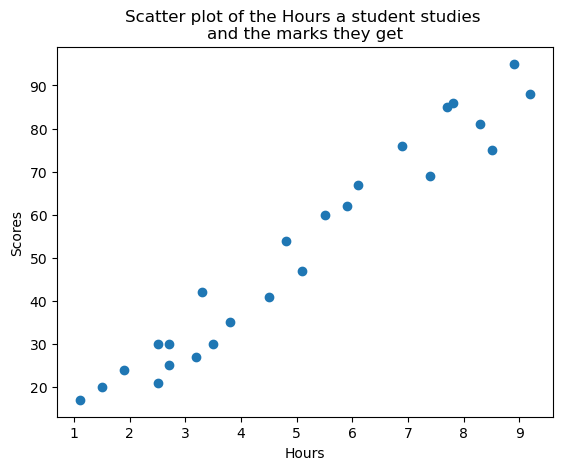

In [3]:
plt.scatter(df['Hours'],df['Scores'])
plt.title("Scatter plot of the Hours a student studies \nand the marks they get")
plt.xlabel("Hours")
plt.ylabel('Scores')

In [17]:
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


### The model
From the plot above we can see that these 2 variables are highly correlated (about 98%) and have a positive linear relationship. To predict future scores we will train a linear regression model (by implementing sciikit-learn's LinearRegression algorithm) with the hours as the independent variable (attribute) and the scores as the dependent variable (target). 

Before we train our model we need to split our data into a training and a test set. This can be done using scikit-learn's train_test_split function. We will use 80% as our training data and the other 20% as our testing set to evaluate the model's accuracy. Once the model has been trained we will train it using 100% of the data to improve accuracy. 

In [33]:
from sklearn.model_selection import train_test_split

X = df['Hours'].values.reshape(-1,1) #Reshape turns X into a 2D array, Scikit-Learn's linear regression model expects a 2D input
y = df['Scores'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### The typical steps to building a machine learning model are: 

#### 1. Defining the model: In this case we're building a LinearRegression model
Before implementing this model, it is good practice to take note of the assumptions made by this model.

- This model assumes that our variables (hours and scores) are continuous numeric, not categorical.

- The Data is free of missing values and outliers.

- There is a linear relationship between predictors (Hours) and predictant (Scores).

- All predictors are independent of each other.

- Prediction errors are normally distributed.

In [6]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()

#### 2. Fit: Capturing patterns from our training set.

Training complete.
Intercept:  2.018160041434662
Slope:  [9.91065648]


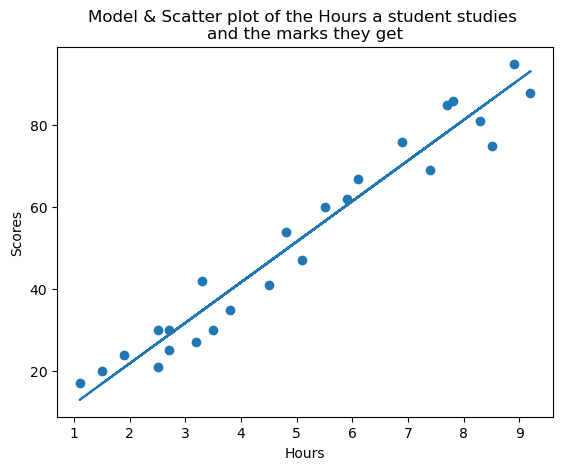

In [7]:
LinReg.fit(X_train,y_train)
c = LinReg.intercept_
m = LinReg.coef_
print("Training complete.")
print("Intercept: ",c )
print("Slope: ", m)
plt.title("Model & Scatter plot of the Hours a student studies \nand the marks they get")
plt.xlabel("Hours")
plt.ylabel('Scores')

y_line = m*X+c
plt.scatter(X,y)
plt.plot(X,y_line)


#### 3. Predict: Using our model to predict future patterns

In [20]:
y_pred = LinReg.predict(X_test)
Pred = pd.DataFrame({"Actual Data":y_test, "Predicted Data":y_pred})
Pred.head()

,Actual Data,Predicted Data
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### 4. Evaluate: How accurate is the model?
There are a number of ways of determining a model's accuracy, a few of which are the Mean Absolute Error (MAE), the Mean Squared Error (MSE) and the Root Mean Squared Error (RMSE) which is just the square root of the MSE. To evaluate the model's accuracy we will use the MAE and the RMSE, the maximum of these two will give us a good idea of the model's accuracy. We could evaluate these errors analyticaly but scikit-learn already has built-in functions that perform these types of calculations.

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [29]:
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print("The mean absolute error is:",mae)
print("the root mean squared error is:",rmse)

The mean absolute error is: 4.183859899002982
the root mean squared error is: 4.647447612100373


The errors recieved using these methods are relatively low. On average, the model is of by 4.6 from the true score value. This is a good model, now all that's left is to train the model using 100% of the data to improve accuracy.

The final intercept is:  2.48367340537321
The final slope is:  [9.77580339]
------------------------------------------


Text(0, 0.5, 'Scores')

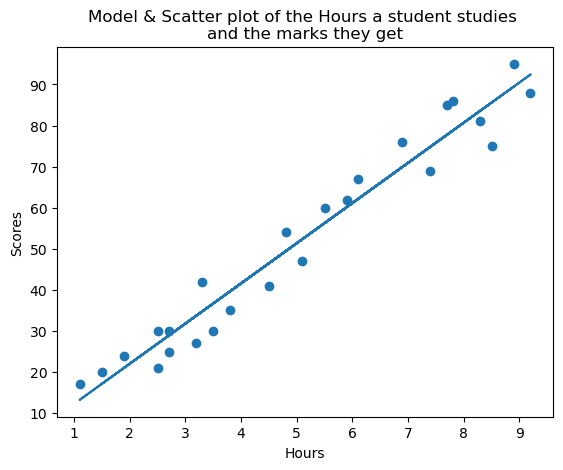

In [11]:
Final_LinReg = LinearRegression()
Final_LinReg.fit(X,y)
m_new = Final_LinReg.coef_
c_new = Final_LinReg.intercept_
y_final = m_new*X+c_new

print("The final intercept is: ",c_new)
print("The final slope is: ",m_new)
print("------------------------------------------")

plt.scatter(X,y)
plt.plot(X,y_final)
plt.title("Model & Scatter plot of the Hours a student studies \nand the marks they get")
plt.xlabel("Hours")
plt.ylabel('Scores')





If the average student studies for an extra hour they will increase their score by 9.8 marks.

In [13]:
print("Let's compare the r^2 value of both models")
print(Final_LinReg.score(X,y))

Let's compare the r^2 value of both models
0.9529481969048356


In [14]:
print(LinReg.score(X,y))

0.9526947647057273


As expected we see a slight improvement in the accuracy of the Final_LinReg model which was trained using 100% of the data. That wraps up my Linear Regression presentation.